In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cars_engage_2022.csv") 
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()[:50]

Unnamed: 0                           0
Make                                75
Model                                0
Variant                              0
Ex-Showroom_Price                    0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Drivetrain                           7
Cylinder_Configuration              13
Emission_Norm                       11
Engine_Location                     43
Fuel_System                          8
Fuel_Tank_Capacity                  69
Fuel_Type                            0
Height                               1
Length                               0
Width                               12
Body_Type                            6
Doors                                4
City_Mileage                       555
Highway_Mileage                    800
ARAI_Certified_Mileage             114
ARAI_Certified_Mileage_for_CNG    1249
Kerb_Weight                        365
Gears                    

In [7]:
df.columns[:30]

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm', 'Engine_Location',
       'Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Height', 'Length',
       'Width', 'Body_Type', 'Doors', 'City_Mileage', 'Highway_Mileage',
       'ARAI_Certified_Mileage', 'ARAI_Certified_Mileage_for_CNG',
       'Kerb_Weight', 'Gears', 'Ground_Clearance', 'Front_Brakes',
       'Rear_Brakes', 'Front_Suspension'],
      dtype='object')

In [9]:
df.columns[30:60]

Index(['Rear_Suspension', 'Front_Track', 'Rear_Track', 'Front_Tyre_&_Rim',
       'Rear_Tyre_&_Rim', 'Power_Steering', 'Power_Windows', 'Power_Seats',
       'Keyless_Entry', 'Power', 'Torque', 'Odometer', 'Speedometer',
       'Tachometer', 'Tripmeter', 'Seating_Capacity', 'Seats_Material', 'Type',
       'Wheelbase', 'Wheels_Size', 'Start_/_Stop_Button', '12v_Power_Outlet',
       'Audiosystem', 'Aux-in_Compatibility', 'Average_Fuel_Consumption',
       'Basic_Warranty', 'Bluetooth', 'Boot-lid_Opener', 'Boot_Space',
       'CD_/_MP3_/_DVD_Player'],
      dtype='object')

In [11]:
df.columns[60:90]

Index(['Central_Locking', 'Child_Safety_Locks', 'Clock', 'Cup_Holders',
       'Distance_to_Empty', 'Door_Pockets', 'Engine_Malfunction_Light',
       'Extended_Warranty', 'FM_Radio', 'Fuel-lid_Opener', 'Fuel_Gauge',
       'Handbrake', 'Instrument_Console', 'Low_Fuel_Warning',
       'Minimum_Turning_Radius', 'Multifunction_Display', 'Sun_Visor',
       'Third_Row_AC_Vents', 'Ventilation_System',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator',
       '3_Point_Seat-Belt_in_Middle_Rear_Seat', 'Ambient_Lightning',
       'Cargo/Boot_Lights', 'Drive_Modes', 'Engine_Immobilizer',
       'High_Speed_Alert_System', 'Lane_Watch_Camera/_Side_Mirror_Camera',
       'Passenger_Side_Seat-Belt_Reminder'],
      dtype='object')

In [13]:
df.columns[90:120]

Index(['Seat_Back_Pockets', 'Voice_Recognition', 'Walk_Away_Auto_Car_Lock',
       'ABS_(Anti-lock_Braking_System)', 'Headlight_Reminder',
       'Adjustable_Headrests', 'Gross_Vehicle_Weight', 'Airbags',
       'Door_Ajar_Warning', 'EBD_(Electronic_Brake-force_Distribution)',
       'Fasten_Seat_Belt_Warning', 'Gear_Shift_Reminder', 'Number_of_Airbags',
       'Compression_Ratio', 'Adjustable_Steering_Column', 'Other_Specs',
       'Other_specs', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'Android_Auto', 'Apple_CarPlay',
       'Cigarette_Lighter', 'Infotainment_Screen',
       'Multifunction_Steering_Wheel', 'Average_Speed',
       'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment',
       'Navigation_System', 'Second_Row_AC_Vents'],
      dtype='object')

In [15]:
df.columns[120:141]

Index(['Tyre_Pressure_Monitoring_System', 'Rear_Center_Armrest',
       'iPod_Compatibility', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Recommended_Tyre_Pressure', 'Heated_Seats',
       'Turbocharger', 'ISOFIX_(Child-Seat_Mount)', 'Rain_Sensing_Wipers',
       'Paddle_Shifters', 'Leather_Wrapped_Steering', 'Automatic_Headlamps',
       'Engine_Type', 'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object')

In [17]:
main = df[['Make','Model','Variant','Ex-Showroom_Price','Body_Type','Displacement','Fuel_Type','Fuel_Tank_Capacity',
           'City_Mileage','Power','Torque','Type','Seating_Capacity','Basic_Warranty','Boot_Space','Number_of_Airbags']]
main

,Make,Model,Variant,Ex-Showroom_Price,Body_Type,Displacement,Fuel_Type,Fuel_Tank_Capacity,City_Mileage,Power,Torque,Type,Seating_Capacity,Basic_Warranty,Boot_Space,Number_of_Airbags
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",Hatchback,624 cc,Petrol,24 litres,?23.6 km/litre,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110 litres,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",Hatchback,624 cc,Petrol,24 litres,?23.6 km/litre,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110 litres,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",Hatchback,624 cc,CNG,15 litres,NaN,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110 litres,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",Hatchback,624 cc,Petrol,24 litres,?23.6 km/litre,38PS@5500rpm,51Nm@4000rpm,Automatic,4.0,2 years /75000 Kms (years/distance whichever c...,94 litres,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",Hatchback,624 cc,Petrol,24 litres,?23.6 km/litre,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110 litres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",Sedan,1498 cc,Diesel,40 litres,22.6 km/litre,100PS@3600rpm,200Nm@1750rpm,Manual,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510 litres,2.0
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",Sedan,1498 cc,Diesel,40 litres,22.6 km/litre,100PS@3600rpm,200Nm@1750rpm,Manual,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510 litres,6.0
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",Sedan,1497 cc,Petrol,40 litres,18 km/litre,119PS@6600rpm,145Nm@4600rpm,Automatic,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510 litres,6.0
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",Sedan,1497 cc,Petrol,40 litres,14.3 km/litre,119PS@6600rpm,145Nm@4600rpm,Automatic,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510 litres,2.0


In [18]:
main['Ex-Showroom_Price'] = main['Ex-Showroom_Price'].str.replace('Rs. '," ").str.replace(',','')

<ipython-input-18-3edb4680e368>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  main['Ex-Showroom_Price'] = main['Ex-Showroom_Price'].str.replace('Rs. '," ").str.replace(',','')
<ipython-input-18-3edb4680e368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Ex-Showroom_Price'] = main['Ex-Showroom_Price'].str.replace('Rs. '," ").str.replace(',','')


In [19]:
main['Ex-Showroom_Price'] = pd.to_numeric(main['Ex-Showroom_Price'],errors='coerce')

<ipython-input-19-d671d1354730>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Ex-Showroom_Price'] = pd.to_numeric(main['Ex-Showroom_Price'],errors='coerce')


In [22]:
main.dtypes

Make                   object
Model                  object
Variant                object
Ex-Showroom_Price       int64
Body_Type              object
Displacement           object
Fuel_Type              object
Fuel_Tank_Capacity     object
City_Mileage           object
Power                  object
Torque                 object
Type                   object
Seating_Capacity      float64
Basic_Warranty         object
Boot_Space             object
Number_of_Airbags     float64
dtype: object

In [23]:
main['Displacement'] = main['Displacement'].str.replace(' cc'," ")
main['Displacement'] = pd.to_numeric(main['Displacement'],errors='coerce')
main['Fuel_Tank_Capacity'] = main['Fuel_Tank_Capacity'].str.replace(' litres'," ")
main['Fuel_Tank_Capacity'] = pd.to_numeric(main['Fuel_Tank_Capacity'],errors='coerce')
main['City_Mileage'] = main['City_Mileage'].str.replace('km/litre',' ').str.replace('?',' ')
main['City_Mileage'] = pd.to_numeric(main['City_Mileage'],errors='coerce')

<ipython-input-23-9bce7ce7f6da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Displacement'] = main['Displacement'].str.replace(' cc'," ")
<ipython-input-23-9bce7ce7f6da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Displacement'] = pd.to_numeric(main['Displacement'],errors='coerce')
<ipython-input-23-9bce7ce7f6da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [24]:
main['Boot_Space'] = main['Boot_Space'].str.replace(' litres'," ")

<ipython-input-24-007c7747b7b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Boot_Space'] = main['Boot_Space'].str.replace(' litres'," ")


In [25]:
main['Boot_Space'] = pd.to_numeric(main['Boot_Space'],errors='coerce')

<ipython-input-25-95f745891ad5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Boot_Space'] = pd.to_numeric(main['Boot_Space'],errors='coerce')


In [27]:
main

,Make,Model,Variant,Ex-Showroom_Price,Body_Type,Displacement,Fuel_Type,Fuel_Tank_Capacity,City_Mileage,Power,Torque,Type,Seating_Capacity,Basic_Warranty,Boot_Space,Number_of_Airbags
0,Tata,Nano Genx,Xt,292667,Hatchback,624.0,Petrol,24.0,23.60,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110.0,NaN
1,Tata,Nano Genx,Xe,236447,Hatchback,624.0,Petrol,24.0,23.60,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110.0,NaN
2,Tata,Nano Genx,Emax Xm,296661,Hatchback,624.0,CNG,15.0,NaN,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110.0,NaN
3,Tata,Nano Genx,Xta,334768,Hatchback,624.0,Petrol,24.0,23.60,38PS@5500rpm,51Nm@4000rpm,Automatic,4.0,2 years /75000 Kms (years/distance whichever c...,94.0,NaN
4,Tata,Nano Genx,Xm,272223,Hatchback,624.0,Petrol,24.0,23.60,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1302000,Sedan,1498.0,Diesel,40.0,22.60,100PS@3600rpm,200Nm@1750rpm,Manual,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510.0,2.0
1272,Honda,City,Zx Mt Diesel,1421000,Sedan,1498.0,Diesel,40.0,22.60,100PS@3600rpm,200Nm@1750rpm,Manual,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510.0,6.0
1273,Honda,City,Zx Cvt Petrol,1431000,Sedan,1497.0,Petrol,40.0,18.00,119PS@6600rpm,145Nm@4600rpm,Automatic,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510.0,6.0
1274,Honda,City,V Cvt Petrol,1201000,Sedan,1497.0,Petrol,40.0,14.30,119PS@6600rpm,145Nm@4600rpm,Automatic,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510.0,2.0


In [29]:
main.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Body_Type               6
Displacement           12
Fuel_Type               0
Fuel_Tank_Capacity     69
City_Mileage          589
Power                   0
Torque                  2
Type                    1
Seating_Capacity        6
Basic_Warranty        440
Boot_Space            258
Number_of_Airbags     135
dtype: int64

In [30]:
main.Make.fillna('Mercedes',inplace=True)

C:\Users\anwes\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [32]:
main.isnull().sum()

Make                    0
Model                   0
Variant                 0
Ex-Showroom_Price       0
Body_Type               6
Displacement           12
Fuel_Type               0
Fuel_Tank_Capacity     69
City_Mileage          589
Power                   0
Torque                  2
Type                    1
Seating_Capacity        6
Basic_Warranty        440
Boot_Space            258
Number_of_Airbags     135
dtype: int64

In [33]:
for i in range(883,892):
    main['Make'][i]='Datsun'

<ipython-input-33-a0db222faecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Make'][i]='Datsun'
C:\Users\anwes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
for i in range(349,355):
    main['Make'][i]='Rolls-Royce'

<ipython-input-34-c3363ebf639b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Make'][i]='Rolls-Royce'


In [36]:
main.loc[882:893]

,Make,Model,Variant,Ex-Showroom_Price,Body_Type,Displacement,Fuel_Type,Fuel_Tank_Capacity,City_Mileage,Power,Torque,Type,Seating_Capacity,Basic_Warranty,Boot_Space,Number_of_Airbags
882,Maruti Suzuki,Omni,E 8 Str Bs-Iv,284485,MPV,796.0,Petrol,36.0,13.00,34.7PS@5000rpm,59Nm@2500rpm,Manual,8.0,2 years /40000 Kms (years/distance whichever c...,525.0,NaN
883,Datsun,Go+,Datsun D,412292,MPV,1198.0,Petrol,35.0,12.80,68PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0
884,Datsun,Go+,Datsun T,552656,MPV,1198.0,Petrol,35.0,12.80,68PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0
885,Datsun,Go+,Datsun T (O),574448,MPV,1198.0,Petrol,35.0,16.30,68PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0
886,Datsun,Go+,Datsun A (O),555196,MPV,1198.0,Petrol,35.0,20.62,68PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0
887,Datsun,Go+,Datsun A,500575,MPV,1198.0,Petrol,35.0,20.62,68PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0
888,Datsun,Go+,Datsun T Vdc,593361,MPV,1198.0,Petrol,35.0,12.80,68PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0
889,Datsun,Go+,Datsun T (O) Vdc,615153,MPV,1198.0,Petrol,35.0,16.30,68PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0
890,Datsun,Go+,Datsun T Cvt,658361,MPV,1198.0,Petrol,35.0,12.80,78PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0
891,Datsun,Go+,Datsun T (O) Cvt,680153,MPV,1198.0,Petrol,35.0,16.30,78PS@5000rpm,104Nm@4000rpm,Manual,7.0,2 years / Unlimited Kms,347.0,2.0


In [38]:
main.Number_of_Airbags.fillna(0.0,inplace = True)

In [40]:
main.isnull().sum()

Make                    0
Model                   0
Variant                 0
Ex-Showroom_Price       0
Body_Type               6
Displacement           12
Fuel_Type               0
Fuel_Tank_Capacity     69
City_Mileage          589
Power                   0
Torque                  2
Type                    1
Seating_Capacity        6
Basic_Warranty        440
Boot_Space            258
Number_of_Airbags       0
dtype: int64

In [42]:
main.Displacement.median()

1497.0

In [43]:
main.Displacement=main.Displacement.fillna(1497.0)

C:\Users\anwes\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
main

,Make,Model,Variant,Ex-Showroom_Price,Body_Type,Displacement,Fuel_Type,Fuel_Tank_Capacity,City_Mileage,Power,Torque,Type,Seating_Capacity,Basic_Warranty,Boot_Space,Number_of_Airbags
0,Tata,Nano Genx,Xt,292667,Hatchback,624.0,Petrol,24.0,23.60,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110.0,0.0
1,Tata,Nano Genx,Xe,236447,Hatchback,624.0,Petrol,24.0,23.60,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110.0,0.0
2,Tata,Nano Genx,Emax Xm,296661,Hatchback,624.0,CNG,15.0,NaN,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110.0,0.0
3,Tata,Nano Genx,Xta,334768,Hatchback,624.0,Petrol,24.0,23.60,38PS@5500rpm,51Nm@4000rpm,Automatic,4.0,2 years /75000 Kms (years/distance whichever c...,94.0,0.0
4,Tata,Nano Genx,Xm,272223,Hatchback,624.0,Petrol,24.0,23.60,38PS@5500rpm,51Nm@4000rpm,Manual,4.0,2 years /75000 Kms (years/distance whichever c...,110.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1302000,Sedan,1498.0,Diesel,40.0,22.60,100PS@3600rpm,200Nm@1750rpm,Manual,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510.0,2.0
1272,Honda,City,Zx Mt Diesel,1421000,Sedan,1498.0,Diesel,40.0,22.60,100PS@3600rpm,200Nm@1750rpm,Manual,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510.0,6.0
1273,Honda,City,Zx Cvt Petrol,1431000,Sedan,1497.0,Petrol,40.0,18.00,119PS@6600rpm,145Nm@4600rpm,Automatic,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510.0,6.0
1274,Honda,City,V Cvt Petrol,1201000,Sedan,1497.0,Petrol,40.0,14.30,119PS@6600rpm,145Nm@4600rpm,Automatic,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",510.0,2.0


In [47]:
main.Boot_Space.mode()

0    350.0
dtype: float64

In [48]:
main.Boot_Space=main.Boot_Space.fillna(350.0)

C:\Users\anwes\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
main.isnull().sum()

Make                    0
Model                   0
Variant                 0
Ex-Showroom_Price       0
Body_Type               6
Displacement            0
Fuel_Type               0
Fuel_Tank_Capacity     69
City_Mileage          589
Power                   0
Torque                  2
Type                    1
Seating_Capacity        6
Basic_Warranty        440
Boot_Space              0
Number_of_Airbags       0
dtype: int64

In [52]:
main.Basic_Warranty.mode()

0    2 years / Unlimited Kms
dtype: object

In [53]:
main.Basic_Warranty=main.Basic_Warranty.fillna('2 years / Unlimited Kms',inplace=True)

C:\Users\anwes\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [55]:
main.isnull().sum()

Make                     0
Model                    0
Variant                  0
Ex-Showroom_Price        0
Body_Type                6
Displacement             0
Fuel_Type                0
Fuel_Tank_Capacity      69
City_Mileage           589
Power                    0
Torque                   2
Type                     1
Seating_Capacity         6
Basic_Warranty        1276
Boot_Space               0
Number_of_Airbags        0
dtype: int64

In [56]:
main.drop('Basic_Warranty', inplace=True, axis=1)

C:\Users\anwes\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
main.Fuel_Tank_Capacity.median()

46.0

In [60]:
main.Fuel_Tank_Capacity = main.Fuel_Tank_Capacity.fillna(46.0)

In [62]:
main.City_Mileage.median()

15.29

In [63]:
main.City_Mileage = main.City_Mileage.fillna(15.29)

In [66]:
main.Torque.mode()

0    200Nm@1750rpm
1     90Nm@3500rpm
dtype: object

In [68]:
main.Torque = main.Torque.fillna('200Nm@1750rpm')

In [70]:
main.isnull().sum()

Make                  0
Model                 0
Variant               0
Ex-Showroom_Price     0
Body_Type             6
Displacement          0
Fuel_Type             0
Fuel_Tank_Capacity    0
City_Mileage          0
Power                 0
Torque                0
Type                  1
Seating_Capacity      6
Boot_Space            0
Number_of_Airbags     0
dtype: int64

In [73]:
null_values = main[main.isna().any(axis=1)]

In [75]:
null_values

,Make,Model,Variant,Ex-Showroom_Price,Body_Type,Displacement,Fuel_Type,Fuel_Tank_Capacity,City_Mileage,Power,Torque,Type,Seating_Capacity,Boot_Space,Number_of_Airbags
239,Mahindra,Alturas G4,2Wd At,2770150,NaN,2157.0,Diesel,70.0,15.29,178bhp@400rpm,420Nm@1600-2600rpm,Automatic,NaN,350.0,2.0
242,Volkswagen,Tiguan,Highline 2.0L Tdi Amt,3153500,SUV,1968.0,Diesel,71.0,15.29,141PS@4000rpm,340Nm@1750-2750rpm,Automatic,NaN,615.0,6.0
303,Mercedes,Mercedes-Benz E-Class Cabriolet,E400,7711338,Convertible,2996.0,Petrol,80.0,4.50,334PS@6000RPM,480Nm@1600-4000RPM,NaN,4.0,540.0,6.0
598,Renault,Lodgy,Stepway Rxz 110Ps 8-Seater,1211599,MUV,1461.0,Diesel,50.0,21.04,110PS@4000rpm,245Nm@1750rpm,Manual,NaN,759.0,2.0
843,Maserati,Ghibli,Diesel,13387856,NaN,2987.0,Diesel,70.0,15.29,275PS@4000rpm,570Nm@2000-2600rpm,Automatic,5.0,500.0,0.0
844,Maserati,Ghibli,Gransport,13881858,NaN,2987.0,Diesel,70.0,15.29,275bhp@4000RPM,600Nm@2000rpm,Automatic,5.0,500.0,0.0
845,Maserati,Ghibli,Granlusso,14247814,NaN,2987.0,Diesel,70.0,15.29,275bhp@4000RPM,600Nm@2000rpm,Automatic,5.0,500.0,0.0
1162,Jaguar,F-Type,5.0 Convertible R,23659454,Convertible,5000.0,Petrol,46.0,12.05,495PS@6500RPM,625Nm@2500-5500rpm,Automatic,NaN,350.0,0.0
1253,Porsche,Cayenne Coupe,Base,13151000,NaN,2995.0,Petrol,75.0,15.29,340PS@5300-6400,450Nm@1340-5300,Automatic,NaN,625.0,10.0
1254,Porsche,Cayenne Coupe,Turbo,19763000,NaN,2995.0,Petrol,90.0,15.29,550PS@5750-6000,770Nm@2000-4500,Automatic,NaN,598.0,10.0


In [76]:
main.Type = main.Type.fillna('Automatic')

C:\Users\anwes\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [77]:
for i in range(238,240):
    main['Seating_Capacity'][i] = 7.0

<ipython-input-77-89a619b5af49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Seating_Capacity'][i] = 7.0
C:\Users\anwes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [79]:
for i in range(242,243):
    main['Seating_Capacity'][i] = 7.0

<ipython-input-79-d975794c2079>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Seating_Capacity'][i] = 7.0
C:\Users\anwes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [81]:
for i in range(598,599):
    main['Seating_Capacity'][i] = 8.0

<ipython-input-81-7c5064eed1e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Seating_Capacity'][i] = 8.0
C:\Users\anwes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [82]:
for i in range(1162,1163):
    main['Seating_Capacity'][i] = 2.0

<ipython-input-82-19e41c2bc5cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Seating_Capacity'][i] = 2.0


In [83]:
for i in range(1253,1255):
    main['Seating_Capacity'][i] = 4.0

<ipython-input-83-993ea7fa5892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Seating_Capacity'][i] = 4.0


In [84]:
for i in range(239,240):
    main['Body_Type'][i] = 'SUV'

<ipython-input-84-5d53f264418b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Body_Type'][i] = 'SUV'


In [85]:
for i in range(843,846):
    main['Body_Type'][i] = 'Sedan'

<ipython-input-85-3ab55d10f653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Body_Type'][i] = 'Sedan'


In [91]:
for i in range(1253,1255):
    main['Body_Type'][i] = 'SUV'

<ipython-input-91-b61c432a2a1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Body_Type'][i] = 'SUV'
C:\Users\anwes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [89]:
null_values = main[main.isna().any(axis=1)]

In [93]:
main.isnull().sum()

Make                  0
Model                 0
Variant               0
Ex-Showroom_Price     0
Body_Type             0
Displacement          0
Fuel_Type             0
Fuel_Tank_Capacity    0
City_Mileage          0
Power                 0
Torque                0
Type                  0
Seating_Capacity      0
Boot_Space            0
Number_of_Airbags     0
dtype: int64

In [96]:
le = LabelEncoder()

In [98]:
main['MakeLE'] = le.fit_transform(main['Make'])
main['ModelLE'] = le.fit_transform(main['Model'])
main['VariantLE'] = le.fit_transform(main['Variant'])
main['Body_typeLE'] = le.fit_transform(main['Body_Type'])
main['PowerLE'] = le.fit_transform(main['Power'])
main['TorqueLE'] = le.fit_transform(main['Torque'])
main['TypeLE'] = le.fit_transform(main['Type'])

<ipython-input-98-470796a7caa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['MakeLE'] = le.fit_transform(main['Make'])
<ipython-input-98-470796a7caa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['ModelLE'] = le.fit_transform(main['Model'])
<ipython-input-98-470796a7caa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

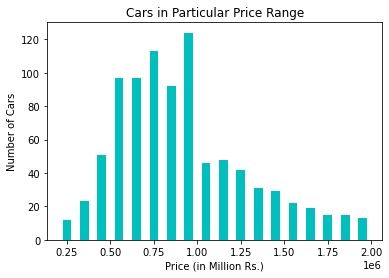

In [101]:
bins=[200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
plt.hist(main['Ex-Showroom_Price'],bins,histtype='bar',rwidth=0.5,color='c')
plt.xlabel('Price (in Million Rs.)')
plt.ylabel('Number of Cars')
plt.title('Cars in Particular Price Range')
plt.show()

Text(0.5, 0, 'Body Type')

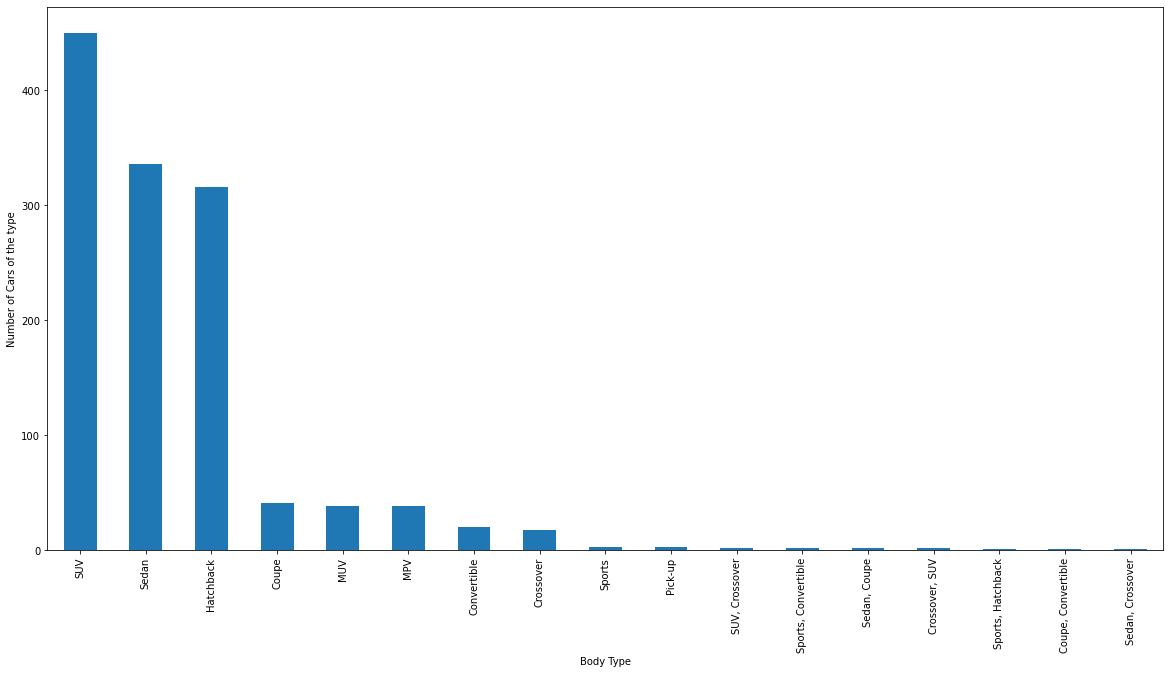

In [103]:
x = main['Body_Type'].value_counts().head(40).plot(kind='bar',figsize=(20, 10))
x.set_ylabel("Number of Cars of the type")
x.set_xlabel("Body Type")

In [ ]:
#The market majorly comprises of cars in the price range of Rs. 7.5 lakh - Rs. 10 lakh and mostly of type SUV.